In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns

sns.set_context("talk")

def get_figsize(wf=0.5, hf=(5.**0.5-1.0)/2.0, columnwidth=320.39525):
    """ adapted from https://stackoverflow.com/questions/29187618/matplotlib-and-latex-beamer-correct-size
    Parameters:
      - wf [float]:  width fraction in columnwidth units
      - hf [float]:  height fraction in columnwidth units.
                     Set by default to golden ratio.
      - columnwidth [float]: width of the column in latex. Get this from LaTeX 
                             using \showthe\columnwidth
    Returns:  [fig_width,fig_height]: that should be given to matplotlib
    """
    fig_width_pt = columnwidth*wf 
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*hf      # height in inches
    return [fig_width, fig_height]

# Experiment 1: ASPP rates

In [15]:
columns = ["Model", "Output-stride", "Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]
data = [["Baseline", 32, 0.2758,     6.3094,     11.437,      0.402,      0.644,      0.819,      0.905],  
        ["1,1,1,1", 32, 0.2695,     6.7413,     10.613,      0.372,      0.680,      0.849,      0.925], 
        ["1,2,3,4", 32, 0.2655,     5.8355,     10.897,      0.388,      0.662,      0.831,      0.912], 
        ["1,3,5,7", 32, 0.2665,     5.8540,     10.833,      0.386,      0.660,      0.835,      0.913], 
        ["1,1,1,1", 16, 0.2835,     7.7113,     11.190,      0.384,      0.674,      0.840,      0.921],  
        ["1,2,3,4", 16, 0.2755,     7.3418,     10.587,      0.367,      0.699,      0.862,      0.930], 
        ["1,3,5,7", 16, 0.2643,     5.5681,     10.789,      0.392,      0.657,      0.826,      0.907]]

baseline_stds = dict(zip(["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"],[0,0,0,0,0,0,0]))
df = pd.DataFrame(columns=columns, data=data)

In [16]:
df.groupby(["Output-stride", "Model"]).mean()

Abs.Rel.  Sq.Rel.    RMSE  RMSE log  δ<1.25  δ<1.25^2  \
Output-stride Model                                                             
16            1,1,1,1     0.2835   7.7113  11.190     0.384   0.674     0.840   
              1,2,3,4     0.2755   7.3418  10.587     0.367   0.699     0.862   
              1,3,5,7     0.2643   5.5681  10.789     0.392   0.657     0.826   
32            1,1,1,1     0.2695   6.7413  10.613     0.372   0.680     0.849   
              1,2,3,4     0.2655   5.8355  10.897     0.388   0.662     0.831   
              1,3,5,7     0.2665   5.8540  10.833     0.386   0.660     0.835   
              Baseline    0.2758   6.3094  11.437     0.402   0.644     0.819   

                        δ<1.25^3  
Output-stride Model               
16            1,1,1,1      0.921  
              1,2,3,4      0.930  
              1,3,5,7      0.907  
32            1,1,1,1      0.925  
              1,2,3,4      0.912  
              1,3,5,7      0.913  
              Baseline     0.905

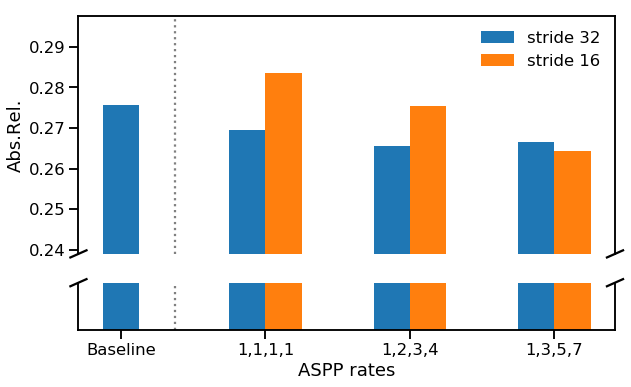

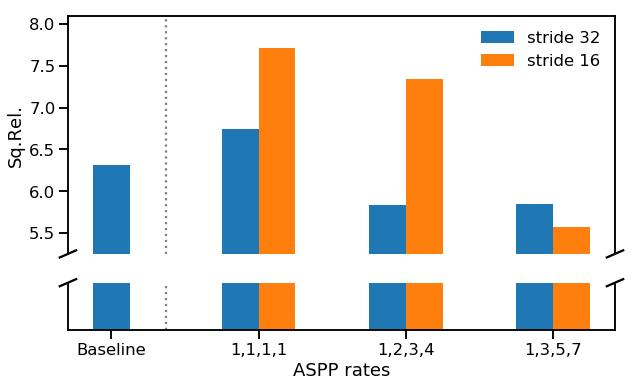

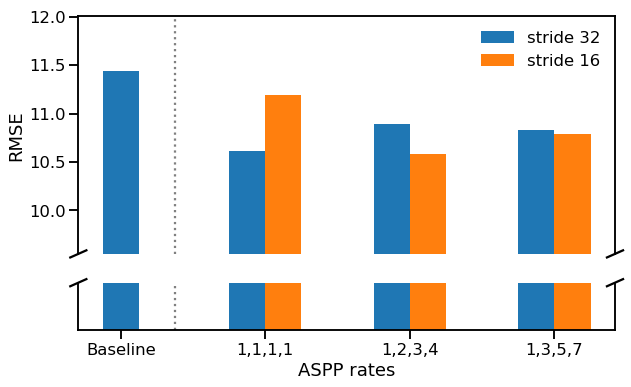

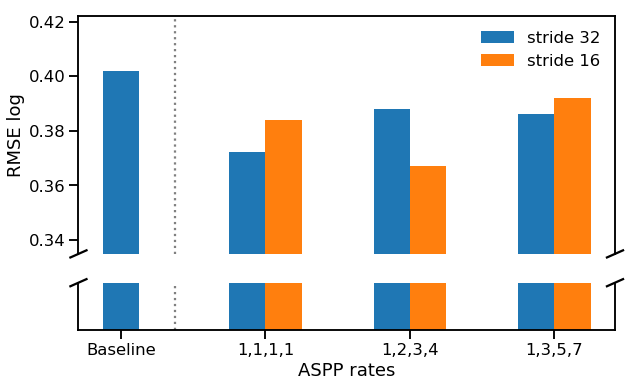

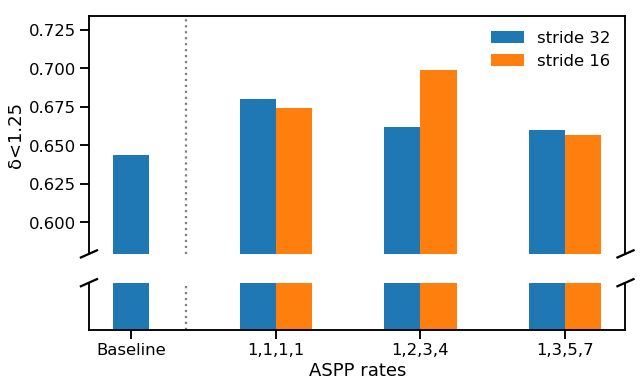

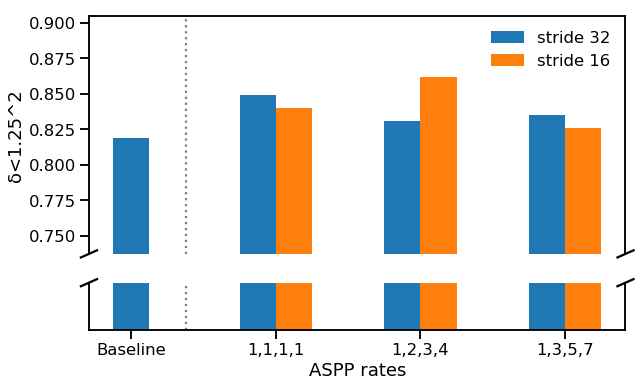

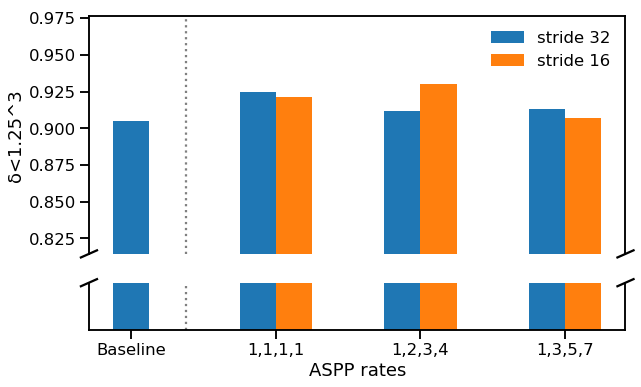

In [18]:
def broken_barplot_multistride(df, key, baseline_stds, ratio=5, ylabel="", figsize=None):
    """ adapted from https://matplotlib.org/examples/pylab_examples/broken_axis.html
    """
    f = plt.figure(figsize=figsize)

    gs = gridspec.GridSpec(2, 1 ,height_ratios=[ratio,1])

    ax = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    
    
    strides = df["Output-stride"].unique()
    
    width = 0.25

    # make x values
    r1 = list(range(len(df[df["Output-stride"] == 32])))
    r1[0] = r1[0] + width/2
    r2 = [x + width for x in r1[1:]]
    r3 = [x + width for x in r2]

    # plot the same data on both axes
    # ax is the actual top ax we are plotting on
    bar = ax.bar(r1, df[df["Output-stride"] == 32][key], yerr=[baseline_stds[key], 0, 0, 0], width=width, label="stride 32")
    ax.bar(r2, df[df["Output-stride"] == 16][key], width=width, label="stride 16")
    #ax.bar(r3, df[df["Output-stride"] == 8][key], width=width, label="stride 8")
    ax.axvline(x=0.5, color='gray', linestyle=':')
    # ax2 is the bottom ax, just for showing that we break the y axis
    bar = ax2.bar(r1, df[df["Output-stride"] == 32][key], width=width, label="stride 32")
    ax2.bar(r2, df[df["Output-stride"] == 16][key], width=width, label="stride 16")
    #ax2.bar(r3, df[df["Output-stride"] == 8][key], width=width, label="stride 8")
    ax2.axvline(x=0.5, color='gray', linestyle=':')
    
    #plt.xticks([r1[0]]+r2, df[df["Output-stride"] == 32]["Model"])
    plt.xticks([r1[0]]+[r+width/2 for r in r1[1:]], df[df["Output-stride"] == 32]["Model"])
    
    ax.legend(frameon=False)

    ylim = ax.get_ylim()
    ylim = 0.9 * min([patch.get_height() for patch in bar.patches]), ylim[1]
    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(ylim)  # most of the data
    ax2.set_ylim(0, 0.003)  # just the bottom to indicate break in y axis

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
    ax2.tick_params(left=False, labelleft=False)
    ax2.xaxis.tick_bottom()
    ax2.set_xlabel("ASPP rates")
    
    ax.set_ylabel(ylabel)

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-right diagonal
    
    f.tight_layout()

    
for error in ["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]:
    broken_barplot_multistride(df, error, baseline_stds, ylabel=error, figsize=get_figsize(2.0))
    plt.savefig("../data/plots/vkitti/experiment1_{}.pdf".format(error.replace(".", "")))

# Experiment 2: ASPP modules

In [11]:
columns2 = ["Model", "Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3", "#params"]

data2 = [["Baseline", 0.2758,     6.3094,     11.437,      0.402,      0.644,      0.819,      0.905, 58452008], 
        ["1", 0.2836,     7.5322,     11.153,      0.384,      0.672,      0.840,      0.919, 44120216],
        ["1,1", 0.2546,     5.2507,     10.704,      0.378,      0.673,      0.839,      0.918, 48904856],
        ["1,1,1", 0.2692,     6.1824,     10.909,      0.381,      0.661,      0.838,      0.919, 53689496],
        ["1,1,1,1", 0.2695,     6.7413,     10.613,      0.372,      0.680,      0.849,      0.925, 58474136],
        ["1,1,1,1,1", 0.2665,     6.4071,     10.982,      0.379,      0.675,      0.846,      0.921, 63258776], 
        ["1,1,1,1,1,1", 0.2709,     6.5876,     11.178,      0.386,      0.670,      0.836,      0.916, 68043416],
        ["1,1,1,1,1,1,1", 0.2695,     6.2413,     11.205,      0.386,      0.664,      0.835,      0.917, 72828056]]

df2 = pd.DataFrame(columns=columns2, data=data2)
df2

,Model,Abs.Rel.,Sq.Rel.,RMSE,RMSE log,δ<1.25,δ<1.25^2,δ<1.25^3,#params
0,Baseline,0.2758,6.3094,11.437,0.402,0.644,0.819,0.905,58452008
1,1,0.2836,7.5322,11.153,0.384,0.672,0.840,0.919,44120216
2,"1,1",0.2546,5.2507,10.704,0.378,0.673,0.839,0.918,48904856
3,"1,1,1",0.2692,6.1824,10.909,0.381,0.661,0.838,0.919,53689496
4,"1,1,1,1",0.2695,6.7413,10.613,0.372,0.680,0.849,0.925,58474136
5,"1,1,1,1,1",0.2665,6.4071,10.982,0.379,0.675,0.846,0.921,63258776
6,"1,1,1,1,1,1",0.2709,6.5876,11.178,0.386,0.670,0.836,0.916,68043416
7,"1,1,1,1,1,1,1",0.2695,6.2413,11.205,0.386,0.664,0.835,0.917,72828056


Text(0.5, 1.0, '#params')

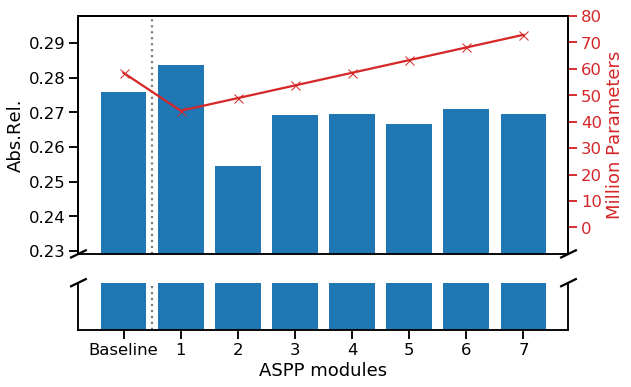

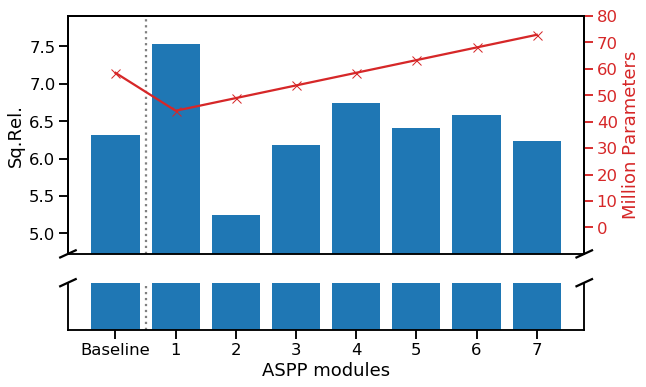

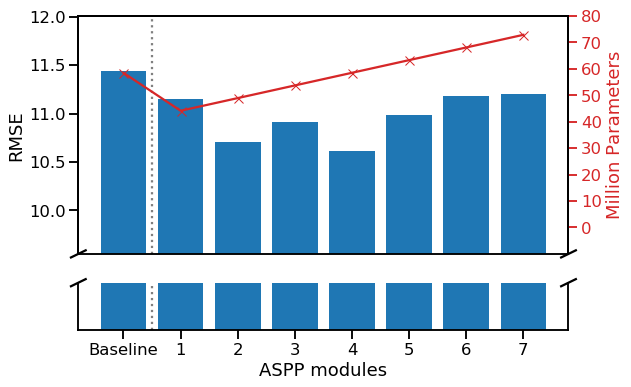

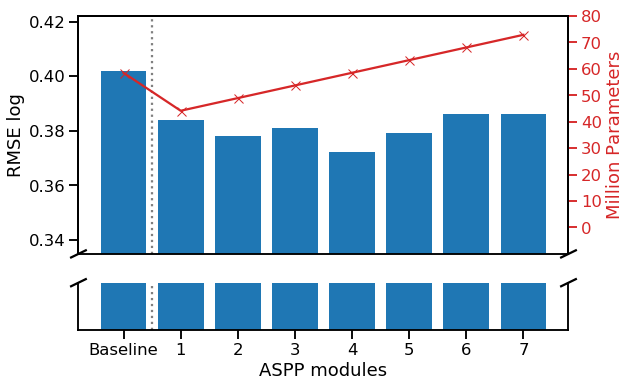

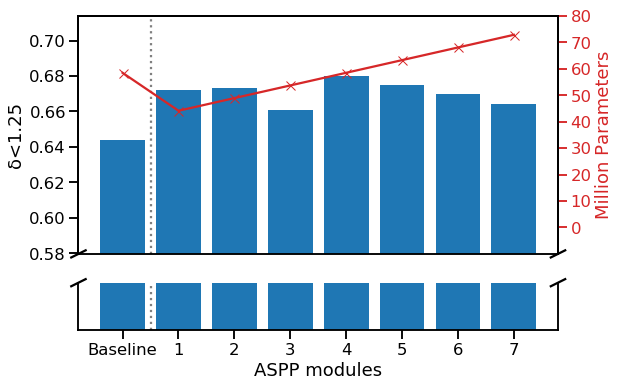

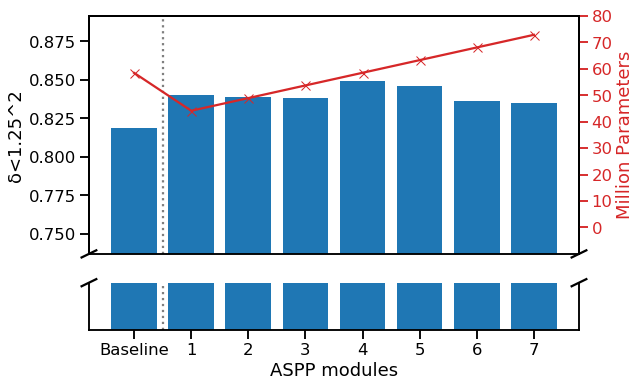

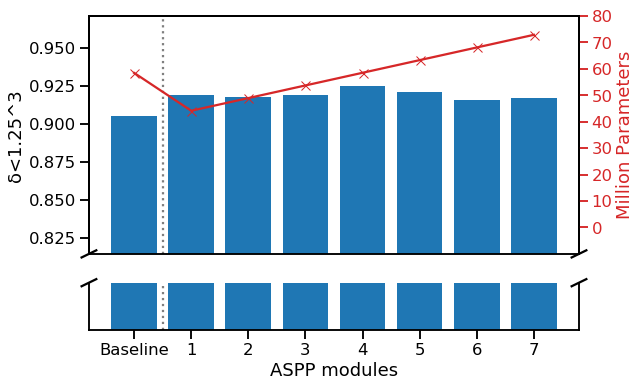

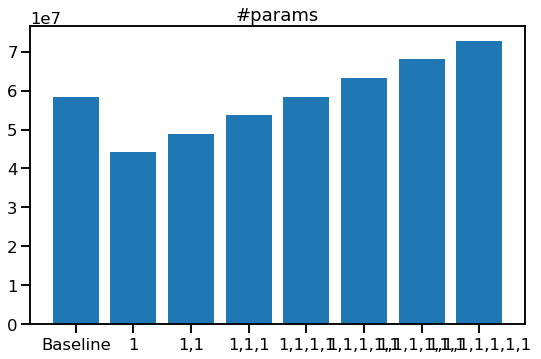

In [23]:
def broken_barplot(x, y, yerr, ratio=5, ylabel="", figsize=None):
    """ adapted from https://matplotlib.org/examples/pylab_examples/broken_axis.html
    """
    f = plt.figure(figsize=figsize)

    gs = gridspec.GridSpec(2, 1 ,height_ratios=[ratio,1])

    ax = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    ax.set_ylabel(ylabel)

    # plot the same data on both axes
    bar = ax.bar(x, y)
    ax.axvline(x=0.5, color='gray', linestyle=':')
    ax2.bar(x, y)
    ax2.axvline(x=0.5, color='gray', linestyle=':')
    
    plt.xticks(list(range(len(x))), ["Baseline"]+list(range(1, len(y)+1)))

    ylim = ax.get_ylim()
    ylim = 0.9 * min([patch.get_height() for patch in bar.patches]), ylim[1]
    # zoom-in / limit the view to different portions of the data
    ax.set_ylim(ylim)  # most of the data
    ax2.set_ylim(0, 0.003)  # just the bottom to indicate break in y axis

    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
    ax2.tick_params(left=False, labelleft=False)
    ax2.xaxis.tick_bottom()
    ax2.set_xlabel("ASPP modules")

    # This looks pretty good, and was fairly painless, but you can get that
    # cut-out diagonal lines look with just a bit more work. The important
    # thing to know here is that in axes coordinates, which are always
    # between 0-1, spine endpoints are at these locations (0,0), (0,1),
    # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
    # appropriate corners of each of our axes, and so long as we use the
    # right transform and disable clipping.

    d = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - ratio*d, 1 + ratio*d), **kwargs)  # bottom-right diagonal
    
    return f, (ax, ax2)

for error in ["Abs.Rel.", "Sq.Rel.", "RMSE", "RMSE log", "δ<1.25", "δ<1.25^2", "δ<1.25^3"]:
    f, (ax, ax2) = broken_barplot(df2["Model"], df2[error], yerr=[0, 0, 0, 0, 0, 0], ylabel=error, figsize=get_figsize(2.0))
    ax1 = ax.twinx()
    
    param_color = 'C3'
    ax1.plot(df2["Model"], df2["#params"], param_color+'x-')
    ax1.set_ylabel('Million Parameters', color=param_color)
    ax1.set_ylim((-10e6, 80e6))
    ax1.set_yticks(np.arange(0, 81e6, 10e6), )
    ax1.set_yticklabels(np.arange(0, 81, 10))
    ax.yaxis.major.formatter._useMathText = False
    
    ax1.tick_params('y', colors=param_color)
    f.tight_layout()
    plt.savefig("../data/plots/vkitti/experiment2_{}.pdf".format(error.replace(".", "")))
    
plt.figure(figsize=get_figsize(2.0))
plt.bar(df2["Model"], df2["#params"])
plt.title('#params')